In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report , confusion_matrix


# Load the iris dataset

In [3]:
df = pd.read_csv("iris.csv")
print("the shape of the data is: ",df.shape)
df.head()

the shape of the data is:  (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Discovery the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# split the data into training and testing sets

In [7]:
x = df.drop('species', axis=1)
y = df['species']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Create a pipeline

In [12]:
catagorical_features = ['species']
numeric_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
pip = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(), catagorical_features)
        ]
    )),
    ('classifier', DecisionTreeClassifier())
])

In [39]:
pr_grid = {
    "max_depth": [None, 2, 3, 4],
    "min_samples_leaf": [1, 2, 3],
    "criterion": ["gini", "entropy"],
}

gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=pr_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring="accuracy",
)
gs.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, ...], 'min_samples_leaf': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


# select the best model

In [40]:
model = gs.best_estimator_
print(f"Best score: {gs.best_score_:.2f}")

Best score: 0.95


In [41]:
y_pred = model.predict(x_test)

# model Evaluation

In [42]:
print(f"accuracy: {accuracy_score(y_test, y_pred):.3f}")
classification_report(y_test, y_pred)

accuracy: 1.000


'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        15\n  versicolor       1.00      1.00      1.00        11\n   virginica       1.00      1.00      1.00        12\n\n    accuracy                           1.00        38\n   macro avg       1.00      1.00      1.00        38\nweighted avg       1.00      1.00      1.00        38\n'

# Draw Decision Tree

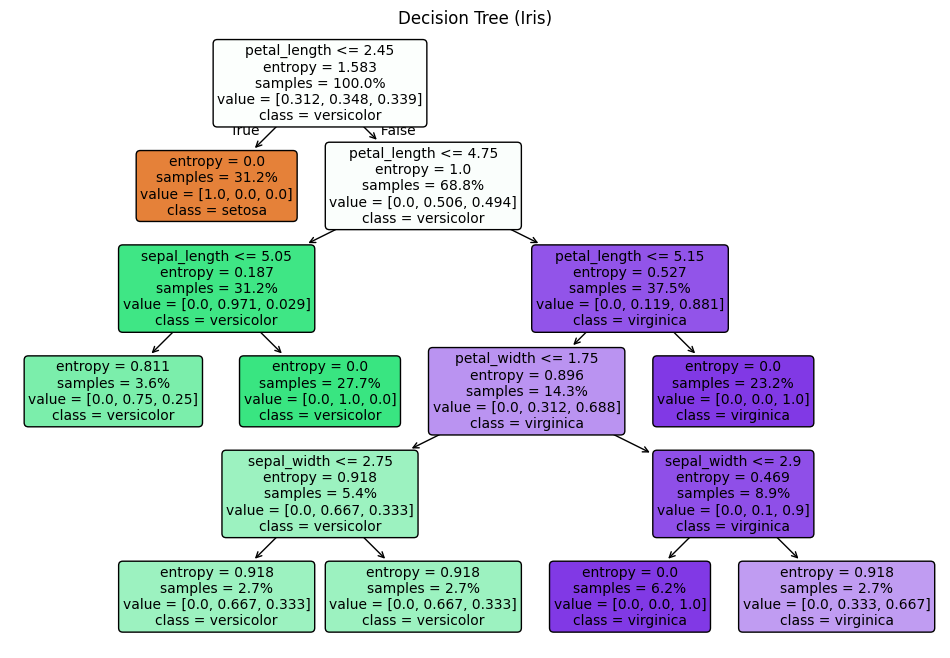

In [43]:
feature_names = df.columns
class_names = df.species.unique()
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,          # color nodes by class/impurity
    rounded=True,
    proportion=True,      # show class proportions
    fontsize=10
)
plt.title("Decision Tree (Iris)")
plt.show()

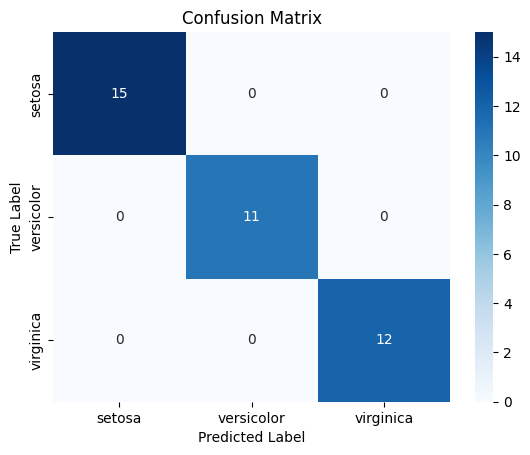

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()